In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [284]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 1. Getting to know the data

In [285]:
train.shape

(1460, 81)

In [286]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [287]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [288]:
categorical = [var for var in df.columns if train[var].dtype =='O']
numerical = [var for var in df.columns if train[var].dtype !='O']

Skewness: 1.882876
Kurtosis: 6.536282


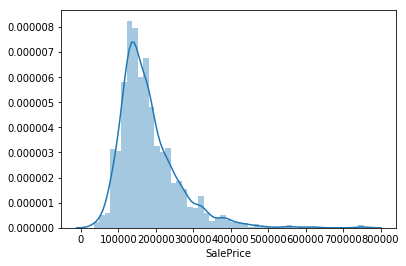

In [289]:
sns.distplot(train["SalePrice"])
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

From the graph above and the statistics measure of skewnewss, we can see that the sale price are skewed to the right, which means that there are some extreme values in the housing sale prices, therefore, to make the data more normalized, a logarithmic tranformation will be used. 

In [290]:
train["log_SalePrice"] = np.log(train['SalePrice'])

Skewness: 0.121335


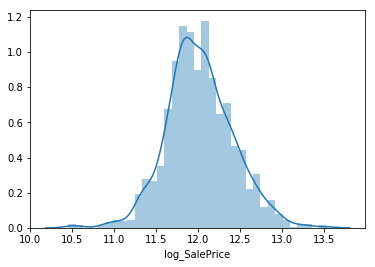

In [291]:
sns.distplot(train["log_SalePrice"])
print("Skewness: %f" % train['log_SalePrice'].skew())

### b. Temporal Variables 

In [292]:
temporal = [i for i in train.columns if "Year" in i or "Yr" in i or "Mo" in i]
train[temporal].head(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


### c. Discrete Variables

In [293]:
discrete = []

for var in numerical:
    if len(df[var].unique()) < 20 and var not in temporal:
        print(var, 'values:', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values: [5 8 6 7 4 2 3 9 1]
BsmtFullBath values: [1 0 2 3]
BsmtHalfBath values: [0 1 2]
FullBath values: [2 1 3 0]
HalfBath values: [1 0 2]
BedroomAbvGr values: [3 4 1 2 0 5 6 8]
KitchenAbvGr values: [1 2 3 0]
TotRmsAbvGrd values: [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values: [0 1 2 3]
GarageCars values: [2 3 1 0 4]
PoolArea values: [  0 512 648 576 555 480 519 738]

There are 13 discrete variables


In [294]:
continuous = [i for i in numerical if i not in discrete and i not in temporal]

# 2. Missing Values

## a. Detecting Missing Values

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64


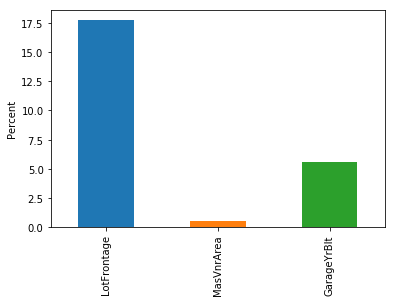

In [295]:
temp = train[numerical].isnull().mean() * 100
print(temp.where(temp > 0).dropna())
temp.where(temp > 0).dropna().plot(kind = "bar")
plt.ylabel("Percent")
plt.show()

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


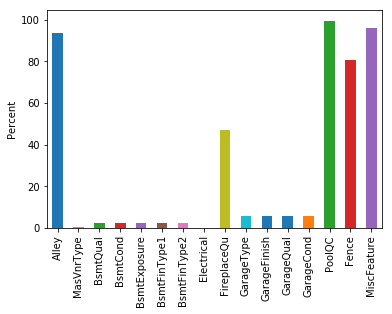

In [296]:
temp = train[categorical].isnull().mean() * 100
print(temp.where(temp > 0).dropna())
temp.where(temp > 0).dropna().plot(kind = "bar")
plt.ylabel("Percent")
plt.show()

## b. Interpretation of Missing Values

In this part we will determine which features are going to be used and neglected, additionally this section will be use in interpreting the missing values. In handling missing values, we are required to know the origin of it happening and define whether the data is missing due to pure coincidence (Missing Completely at Random), or is there something that is happening behind the curtains (MNAR). 

In [297]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2a.i. numerical variables

In [298]:
# LotFrontage Missing Values

Lot = train[[i for i in df.columns if "Lot" in i]]
Lot[Lot["LotFrontage"].isnull()].head(5)

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside


Since there is not any univariate correlation between the Lot Frontage and the Sale Prices, and the NaN might indicate that there is unavailability in the LotFrontage, we will impute the values with zeroes.

In [299]:
# MasVnr Null values occured due to unavailability of the garage itself (MNAR)
# Method: Impute missing values with zeroes on all occuring values of garages
MasVnr = train[[i for i in df.columns if "MasVnr" in i]]
MasVnr[MasVnr.isnull()].sum().reset_index()

,index,0
0,MasVnrType,0.0
1,MasVnrArea,0.0


In [300]:
# Garage Null values occured due to unavailability of the garage itself (MNAR)
# Method: Impute missing values with zeroes on all occuring values of garages
garage = train[[i for i in df.columns if "Garage" in i]]
garage = garage[garage.isnull()].sum().reset_index()
garage.columns = ["garage_feat", "sum_of_missing_values"]
garage

,garage_feat,sum_of_missing_values
0,GarageType,0.0
1,GarageYrBlt,0.0
2,GarageFinish,0.0
3,GarageCars,0.0
4,GarageArea,0.0
5,GarageQual,0.0
6,GarageCond,0.0


In [301]:
# The same case with basement, missing values occured due to inavailability
# Method: Impute missing values with zeroes on all occuring missing values in basement 
basement = train[[i for i in df.columns if "Bsmt" in i]]
basement[basement.isnull()].sum()

BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
dtype: float64

In [302]:
basement[(basement["BsmtFinType2"].isnull()) & (~basement["BsmtFinType1"].isnull())]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0


In [303]:
## The feature alley consists predominantly of missing variable, therefore this variable will be dropped
train[["Alley", "SalePrice"]].fillna("No Alley Data").groupby("Alley").agg({"SalePrice": ["mean", "count"]})

SalePrice      
                        mean count
Alley                             
Grvl           122219.080000    50
No Alley Data  183452.131483  1369
Pave           168000.585366    41

In [304]:
# Fireplace Quality
train[["FireplaceQu", "SalePrice"]].fillna("No Data").groupby("FireplaceQu").agg({"SalePrice": ["mean", "count", "median"]})

SalePrice              
                      mean count  median
FireplaceQu                             
Ex           337712.500000    24  314250
Fa           167298.484848    33  158000
Gd           226351.415789   380  206950
No Data      141331.482609   690  135000
Po           129764.150000    20  131500
TA           205723.488818   313  187500

In [305]:
# check if the occurence of No Data is due to the unavailability of Fireplace
fireplace = train[["Fireplaces", "FireplaceQu"]]
print("number of null values when no fireplace: " +  str(fireplace[fireplace["Fireplaces"] == 0].shape[0]))

number of null values when no fireplace: 690


Since the Fireplace Quality will be null when there is no existing fireplace, impute with string "None" 

SalePrice              
                  mean count  median
PoolQC                              
Ex       490000.000000     2  490000
Fa       215500.000000     2  215500
Gd       201990.000000     3  171000
No Data  180404.663455  1453  162900

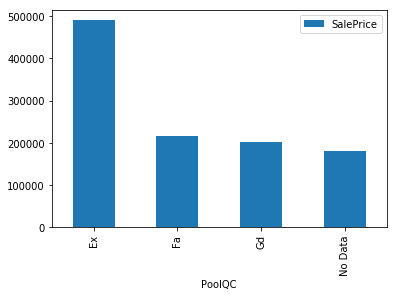

In [306]:
train[["PoolQC", "SalePrice"]].fillna("No Data").groupby("PoolQC").mean().plot(kind = "bar")
train[["PoolQC", "SalePrice"]].fillna("No Data").groupby("PoolQC").agg({"SalePrice": ["mean", "count", "median"]})

SalePrice              
                  mean count  median
Fence                               
GdPrv    178927.457627    59  167500
GdWo     140379.314815    54  138750
MnPrv    148751.089172   157  137450
MnWw     134286.363636    11  130000
No Data  187596.837998  1179  173000

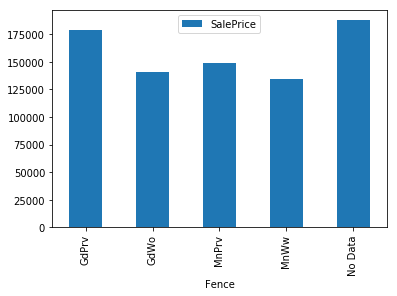

In [307]:
train[["Fence", "SalePrice"]].fillna("No Data").groupby("Fence").mean().plot(kind = "bar")
train[["Fence", "SalePrice"]].fillna("No Data").groupby("Fence").agg({"SalePrice": ["mean", "count", "median"]})

Interestingly, from this data, we can see that the sale prices have more tendency to spike up with more privacy, however this data may be inconsistent due to how there are houses that dont use fences at all but still have higher mean and median to houses that have better fences.

SalePrice              
                      mean count  median
MiscFeature                             
Gar2         170750.000000     2  170750
No Data      182046.410384  1406  164250
Othr          94000.000000     2   94000
Shed         151187.612245    49  144000
TenC         250000.000000     1  250000

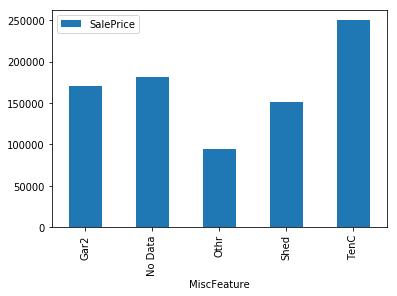

In [308]:
train[["MiscFeature", "SalePrice"]].fillna("No Data").groupby("MiscFeature").mean().plot(kind = "bar")
train[["MiscFeature", "SalePrice"]].fillna("No Data").groupby("MiscFeature").agg({"SalePrice": ["mean", "count", "median"]})

# Outliers

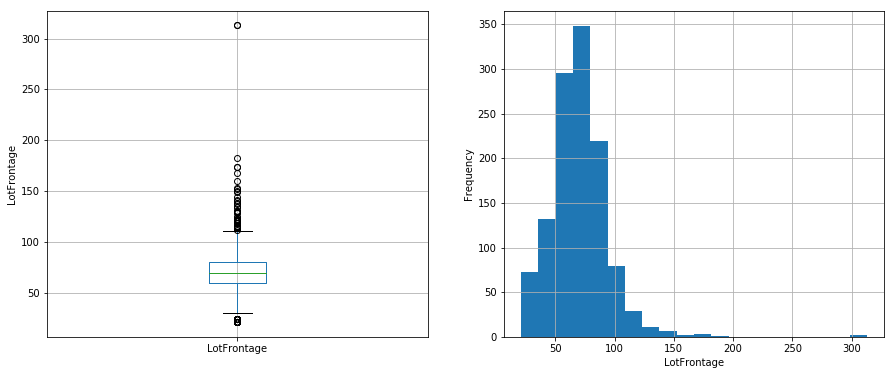

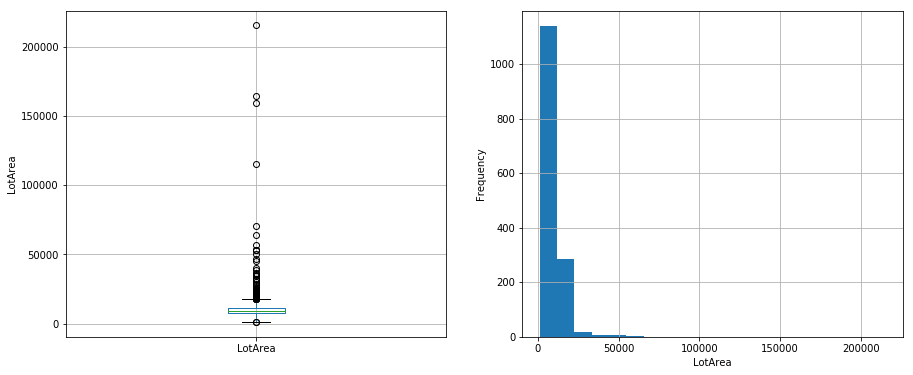

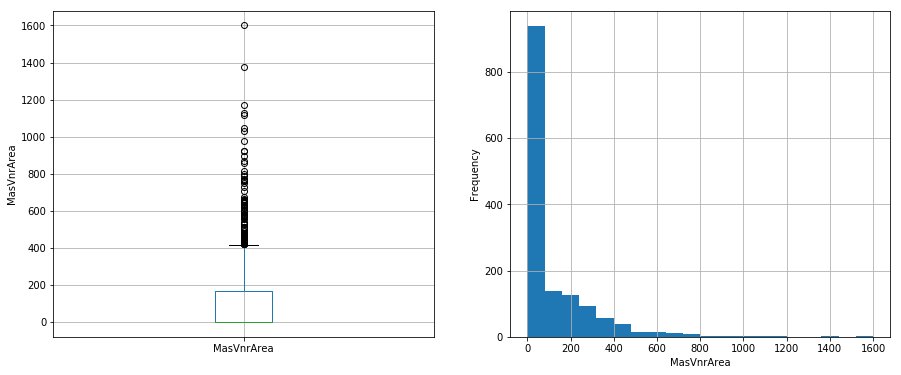

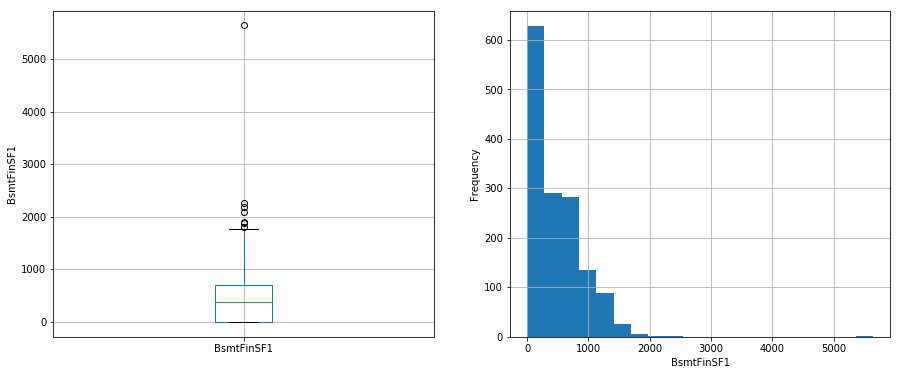

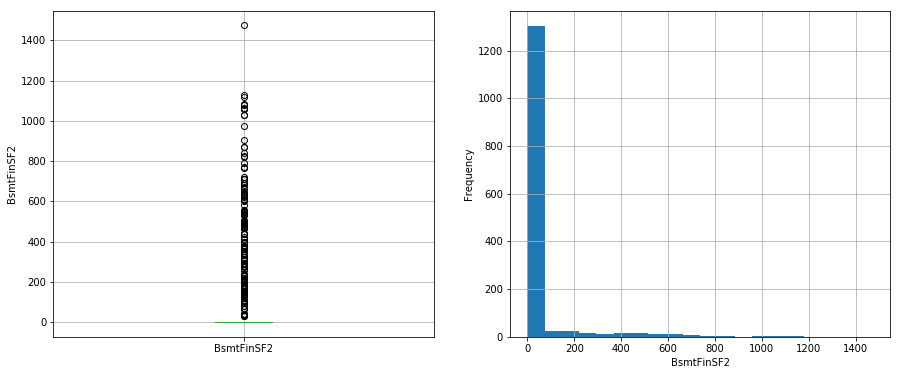

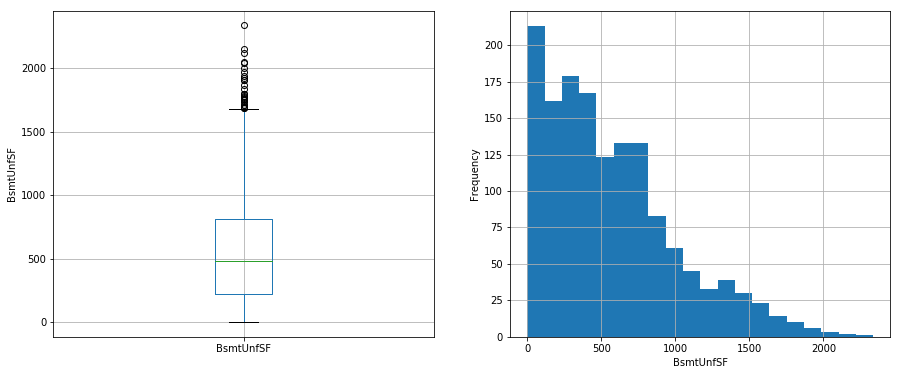

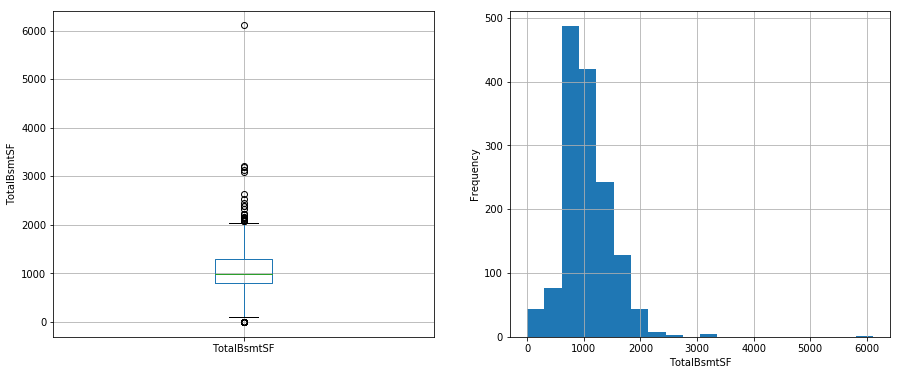

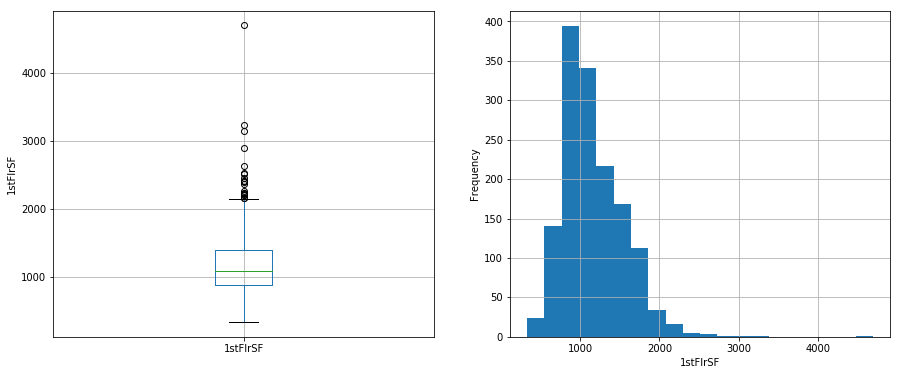

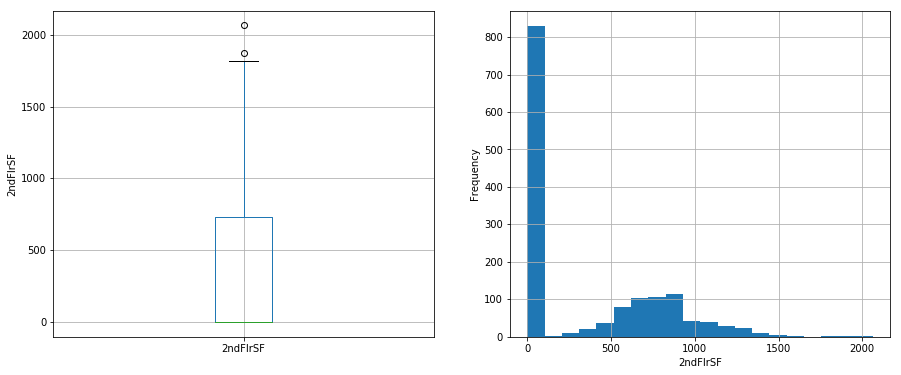

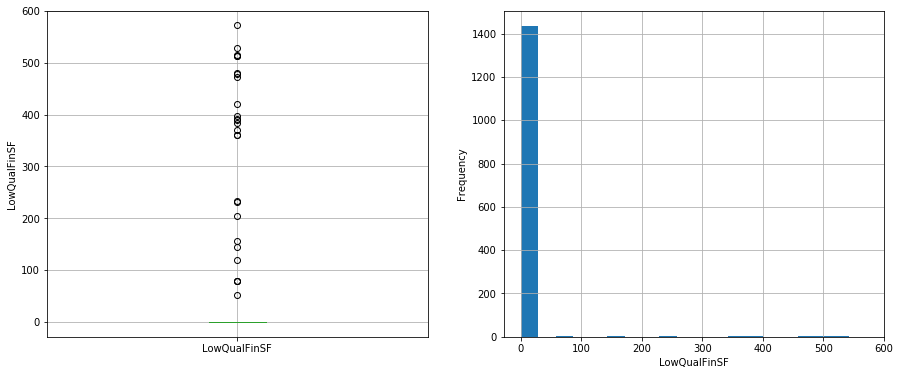

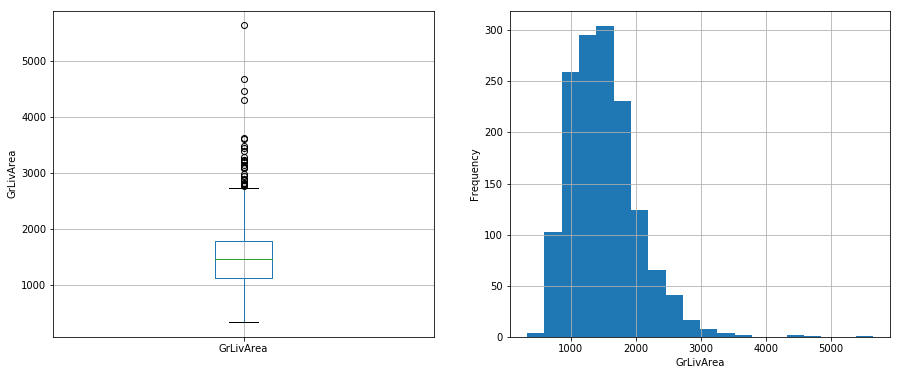

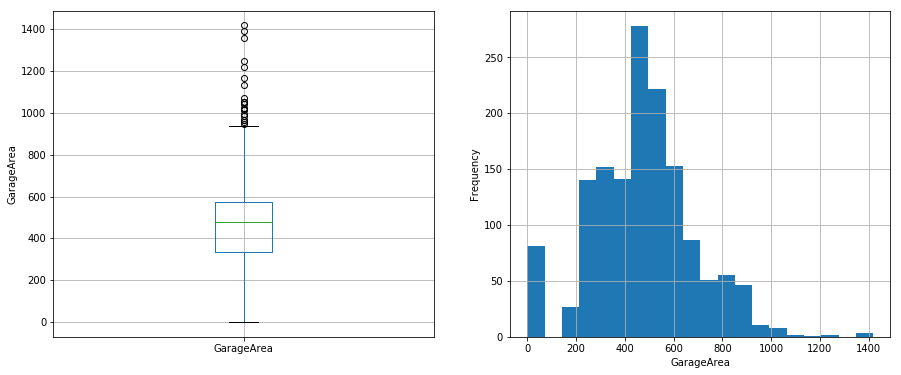

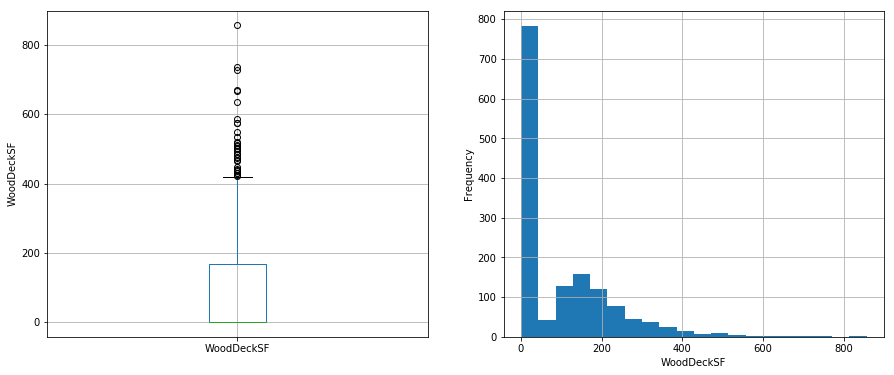

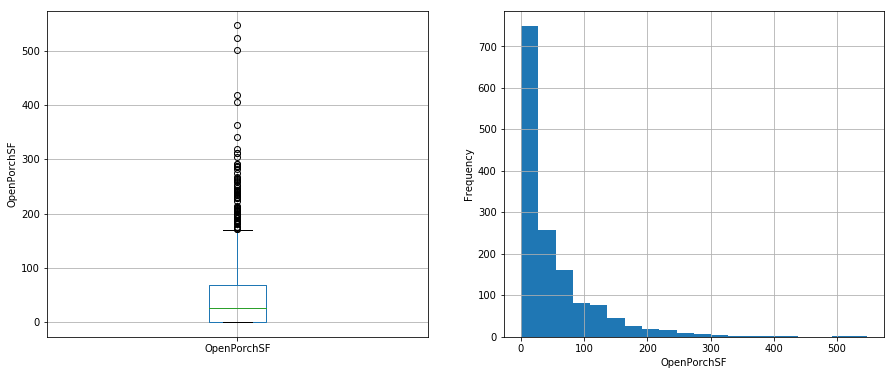

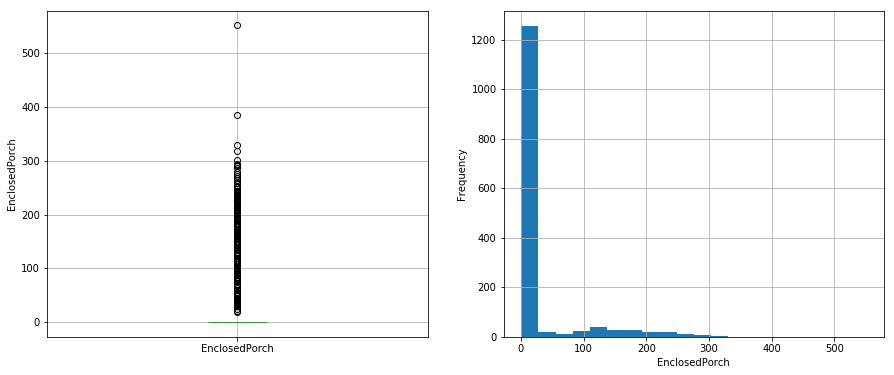

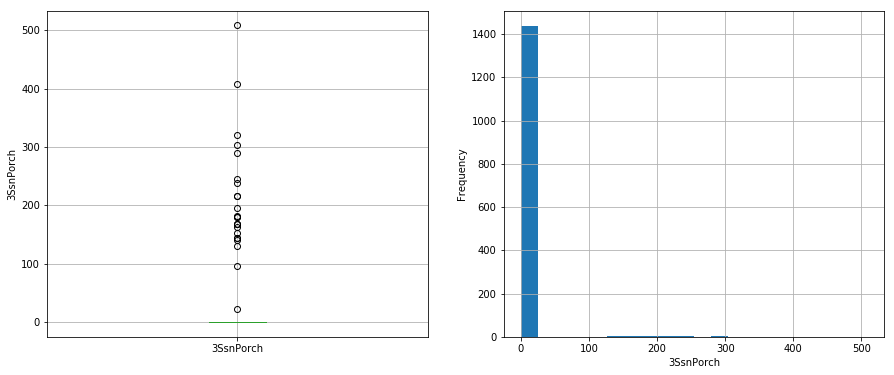

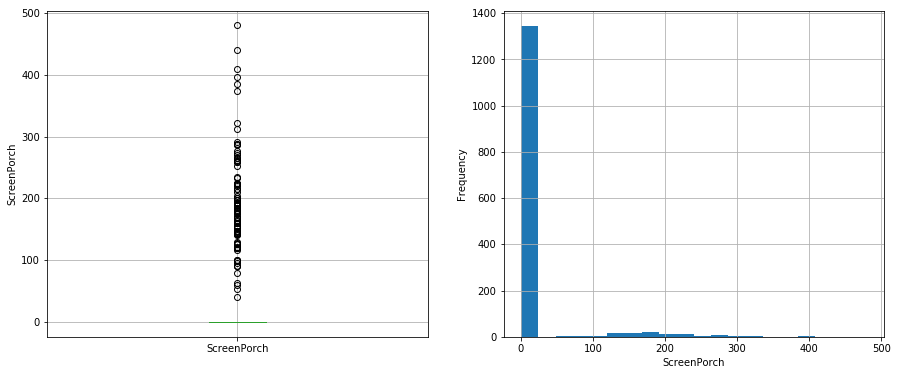

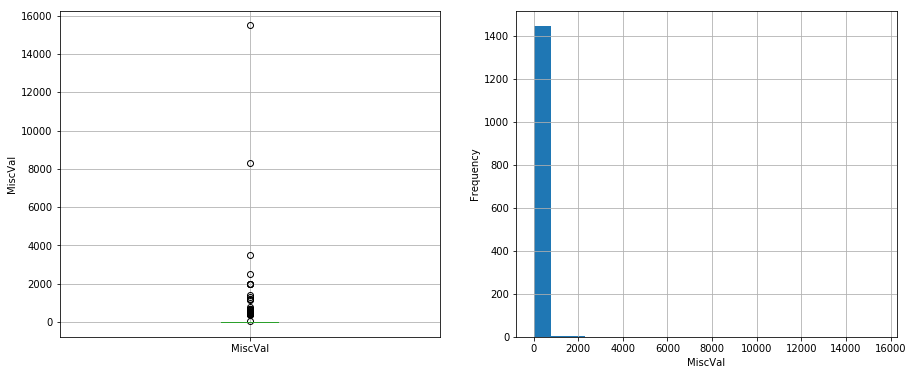

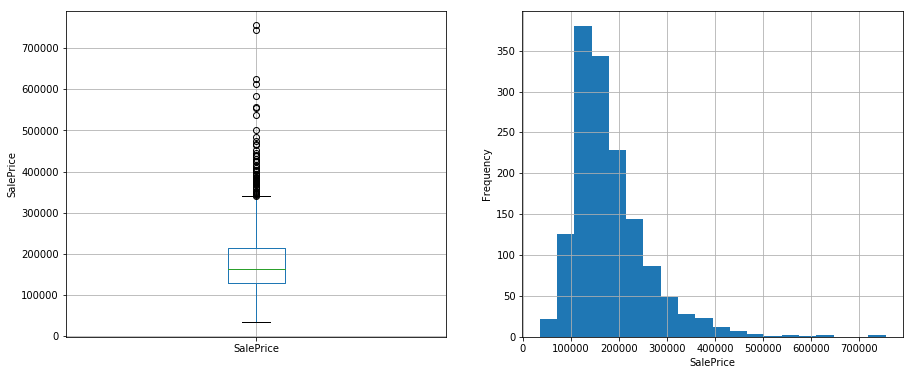

In [309]:
for var in continuous[1:]:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Frequency')
    fig.set_xlabel(var)

    plt.show()

As we can see from the graphs above, there are still variables that have a lot of outliers. Hypothetically, this may be caused due to how some features showed some unavailability, which is indicated by zeroes, therefore, it caused the features to have some outlier that will be required to be fixed. Some of the features that almost the same value over the whole dataset can cause these outliers (quasi-constant features)

# Checking for Rare Values in Discrete Variables

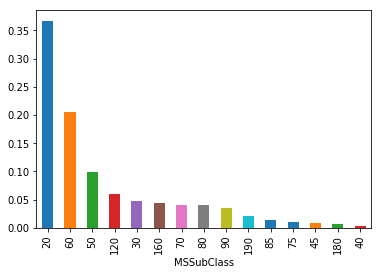

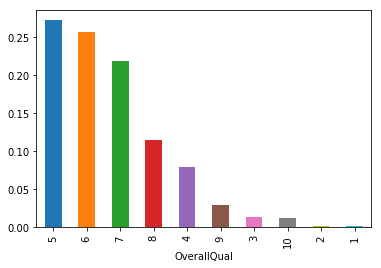

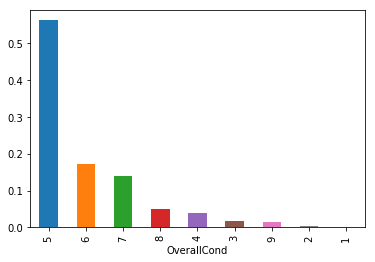

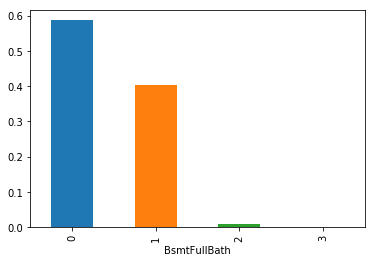

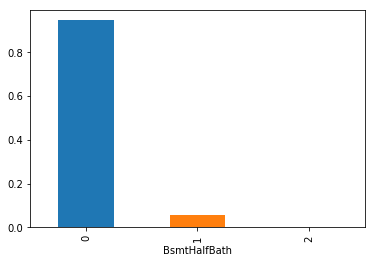

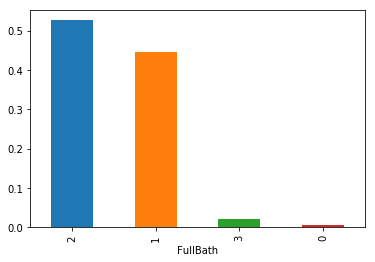

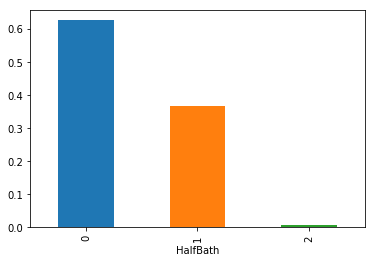

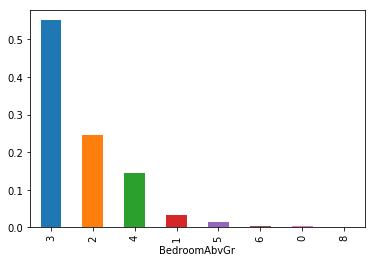

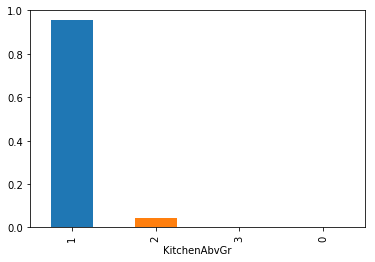

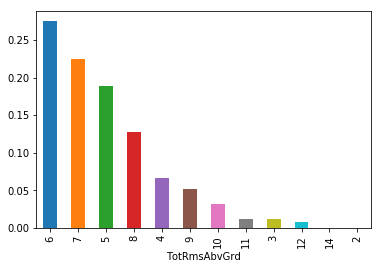

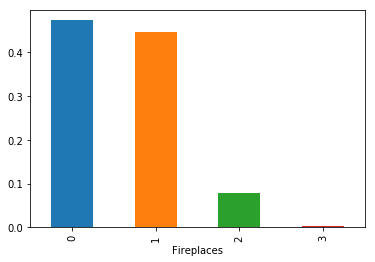

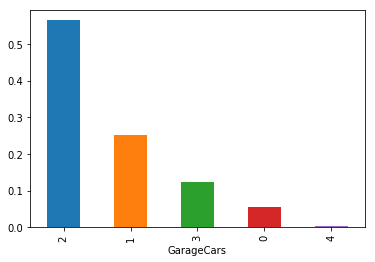

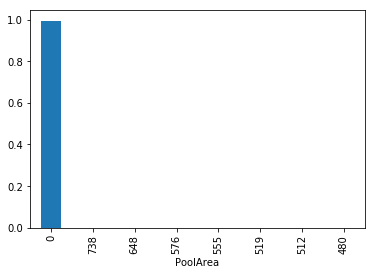

In [310]:
for var in discrete:
    (df[discrete][var].value_counts()/ np.float(len(df))).plot.bar()
    plt.xlabel(var)
    plt.show()

As noted above, there are still some features that possess rare values, which will be fixed during the feature engineering. The criterion of rare values in this project will be set to values that are less than 5% over the whole data inside the feature. 

# Correlation Analysis

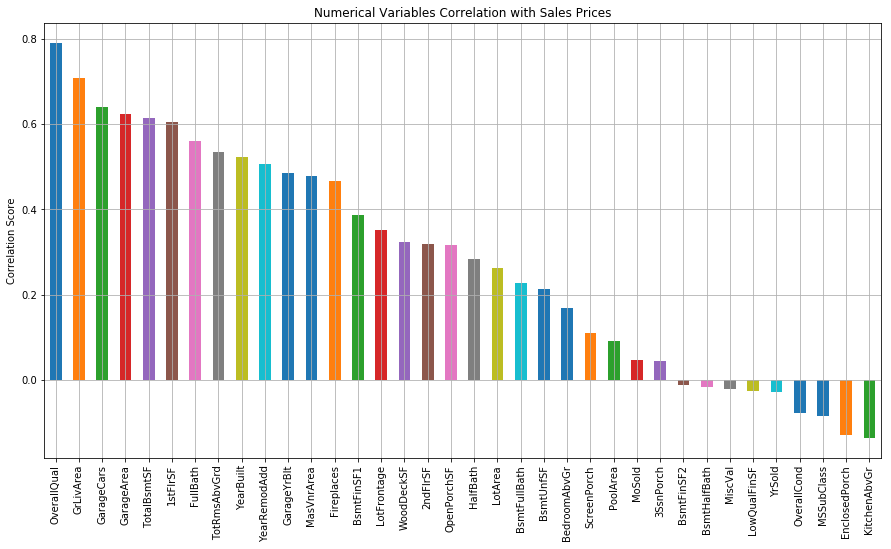

In [311]:
plt.figure(figsize = (15,8))
var_of_interest = train[numerical].corr()['SalePrice'].iloc[1:len(numerical)-1]
var_of_interest.sort_values(ascending = False).plot.bar()
plt.ylabel("Correlation Score")
plt.title("Numerical Variables Correlation with Sales Prices")
plt.grid(True)

note: Cutoff correlation score to be assumed high (0.50)
From the correlation analysis of the figure above, we see that here are several variables that has a high impact on the housing price sales:

 -> Overall material and finishing quality
 
 -> The Year it was built and remodelled
 
 -> The area of the basement and the 1st floor
 
 -> Living area square feet
 
 -> Size of area of Garage in square feet

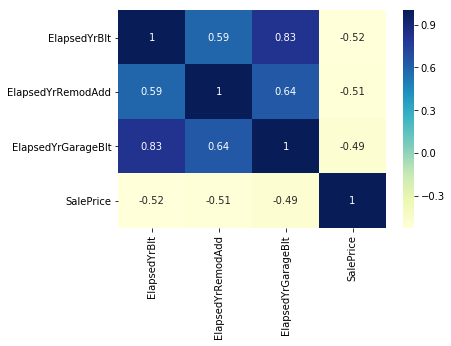

In [313]:
train["ElapsedYrBlt"] = train["YrSold"] - train["YearBuilt"]
train['ElapsedYrRemodAdd'] = train["YrSold"] - train["YearRemodAdd"]
train['ElapsedYrGarageBlt'] = train["YrSold"] - train["GarageYrBlt"]
temporal_new = ["ElapsedYrBlt", "ElapsedYrRemodAdd", "ElapsedYrGarageBlt", "SalePrice"]
sns.heatmap(train[temporal_new].corr(), annot = True, cmap="YlGnBu")

It seems that the house price sales have a significant correlation on when was the last time the house was built as well as the last time it was remodelled, which is consistent to practical real estate. However the year it was last sold was not a strong factor to the house price sales.